In [1]:
import pandas as pd #load all required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt 

In [2]:
%ls

CA_category_id.json        JP_category_id.json
CAvideos.csv               JPvideos.csv
DE_category_id.json        KR_category_id.json
DEvideos.csv               KRvideos.csv
FR_category_id.json        MX_category_id.json
FRvideos.csv               MXvideos.csv
Fetching categories.ipynb  RU_category_id.json
GB_category_id.json        RUvideos.csv
GBvideos.csv               Sentiment-Analysis.ipynb
IN_category_id.json        US_category_id.json
INvideos.csv               USvideos.csv


In [21]:
us_df=pd.read_csv('USvideos.csv')

In [7]:
us_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Performing Text mining and NLP on Title, Tags and description columns

In [46]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

### Counting frequency of words in title column

In [18]:
us_df.title.head()

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: title, dtype: object

In [23]:
#converting title into lower case
lower_title=us_df['title'].str.lower()

In [65]:
#converting the series of titles into a single text
title_text = lower_title.str.cat(sep=' ')

In [66]:
#removing punctuation marks and numbers
title_text=re.sub('[^A-Za-z]+', ' ', title_text)

In [74]:
#getting stop words
stop_words = list(stopwords.words('english'))  
title_text=word_tokenize(title_text)
title_text=[w for w in title_text if w not in stop_words]
#removing words which have less than 4 characters
title_text=[w for w in title_text if len(w)>3]

In [110]:
# Calculate frequency distribution
dist_title=nltk.FreqDist(title_text)
result_title = pd.DataFrame(dist_title.most_common(100),columns=['Word', 'Frequency'])

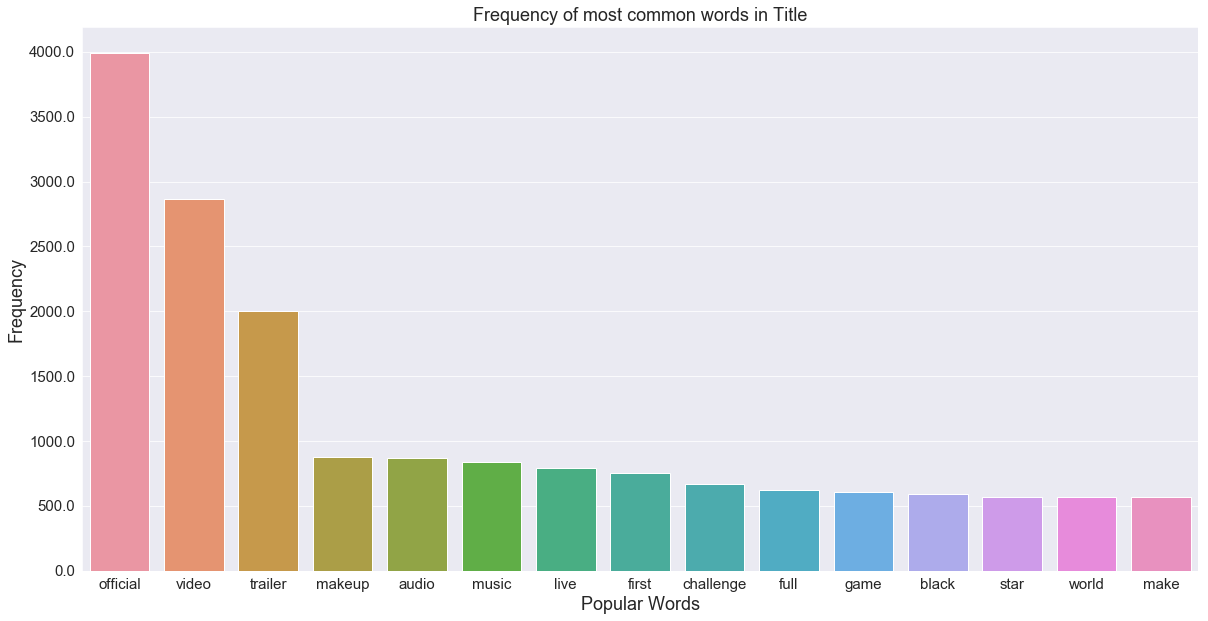

In [190]:
#getting a visualization of the frequency of common words
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_title.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Frequency of most common words in Title',size=18)
plt.show()

### Word Cloud for title words

In [124]:
def word_cloud(data,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = 'white', max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')

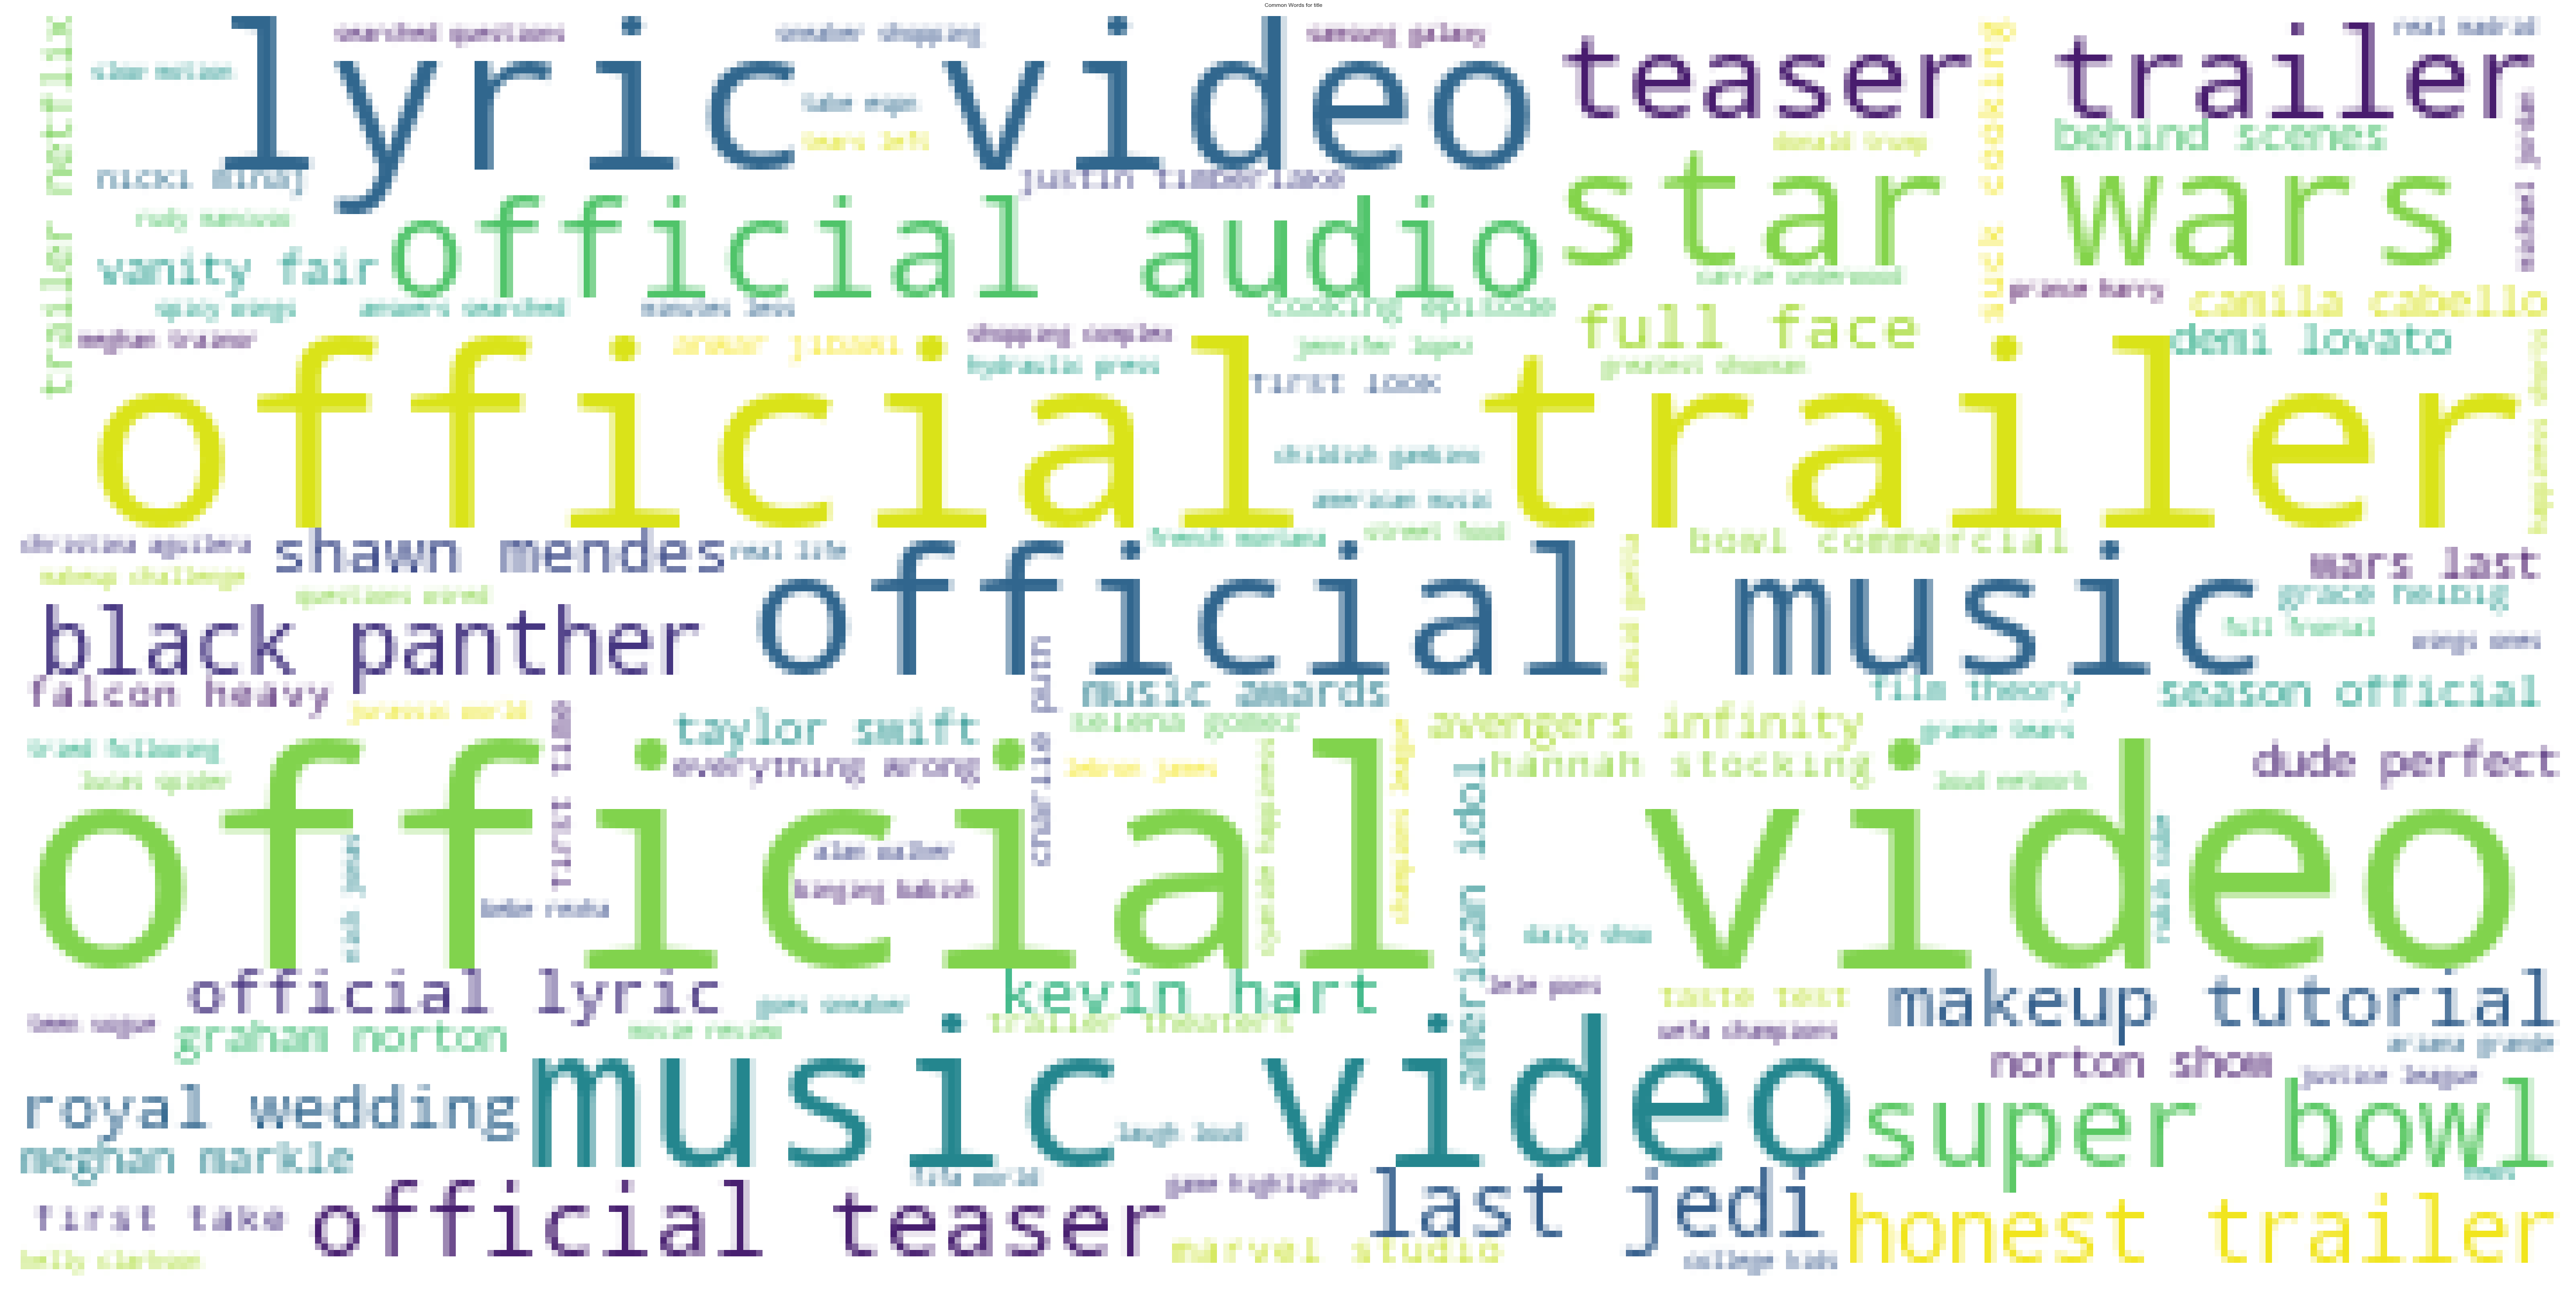

In [125]:
word_cloud(title_text,'Common Words for title')

### Counting frequency for most common words in tags

In [127]:
us_df.tags.head()

0                                      SHANtell martin
1    last week tonight trump presidency|"last week ...
2    racist superman|"rudy"|"mancuso"|"king"|"bach"...
3    rhett and link|"gmm"|"good mythical morning"|"...
4    ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...
Name: tags, dtype: object

In [128]:
#converting tags into lower case
lower_tags=us_df['tags'].str.lower()
#converting the series of tagss into a single text
tags_text = lower_tags.str.cat(sep=' ')
#removing punctuation marks and numbers
tags_text=re.sub('[^A-Za-z]+', ' ', tags_text)
tags_text=word_tokenize(tags_text)
tags_text=[w for w in tags_text if w not in stop_words]
#removing words which have less than 3 characters
tags_text=[w for w in tags_text if len(w)>2]
# Calculate frequency distribution
dist_tags=nltk.FreqDist(tags_text)
result_tags = pd.DataFrame(dist_tags.most_common(100),columns=['Word', 'Frequency'])

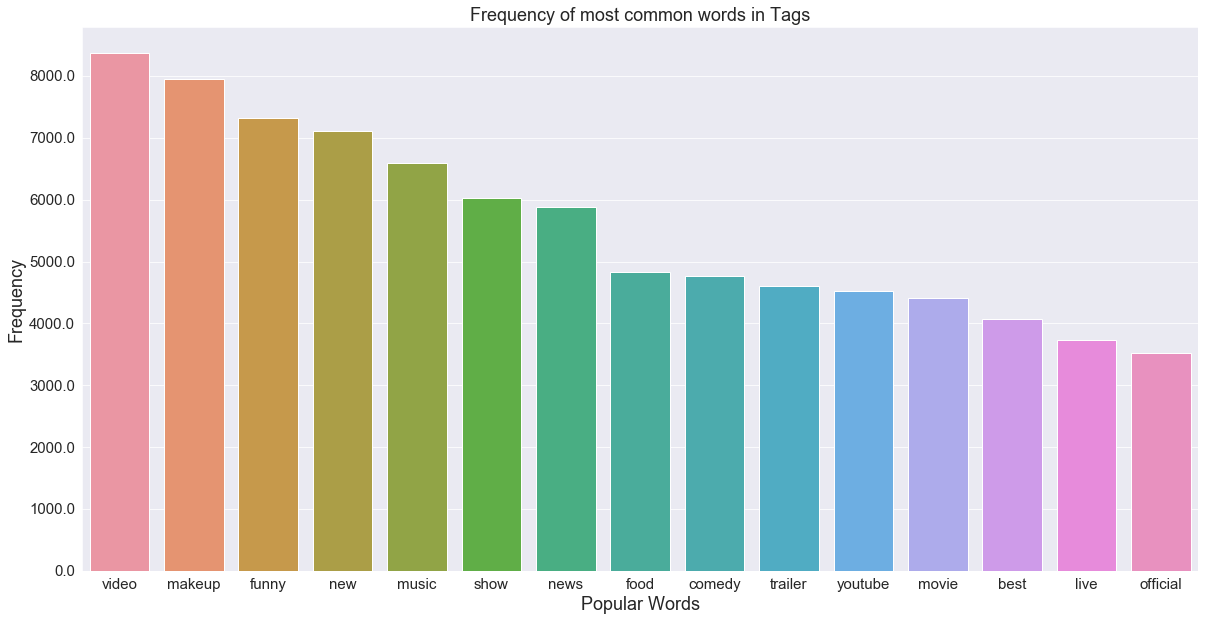

In [191]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_tags.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Frequency of most common words in Tags',size=18)
plt.show()

### Word Cloud for tags

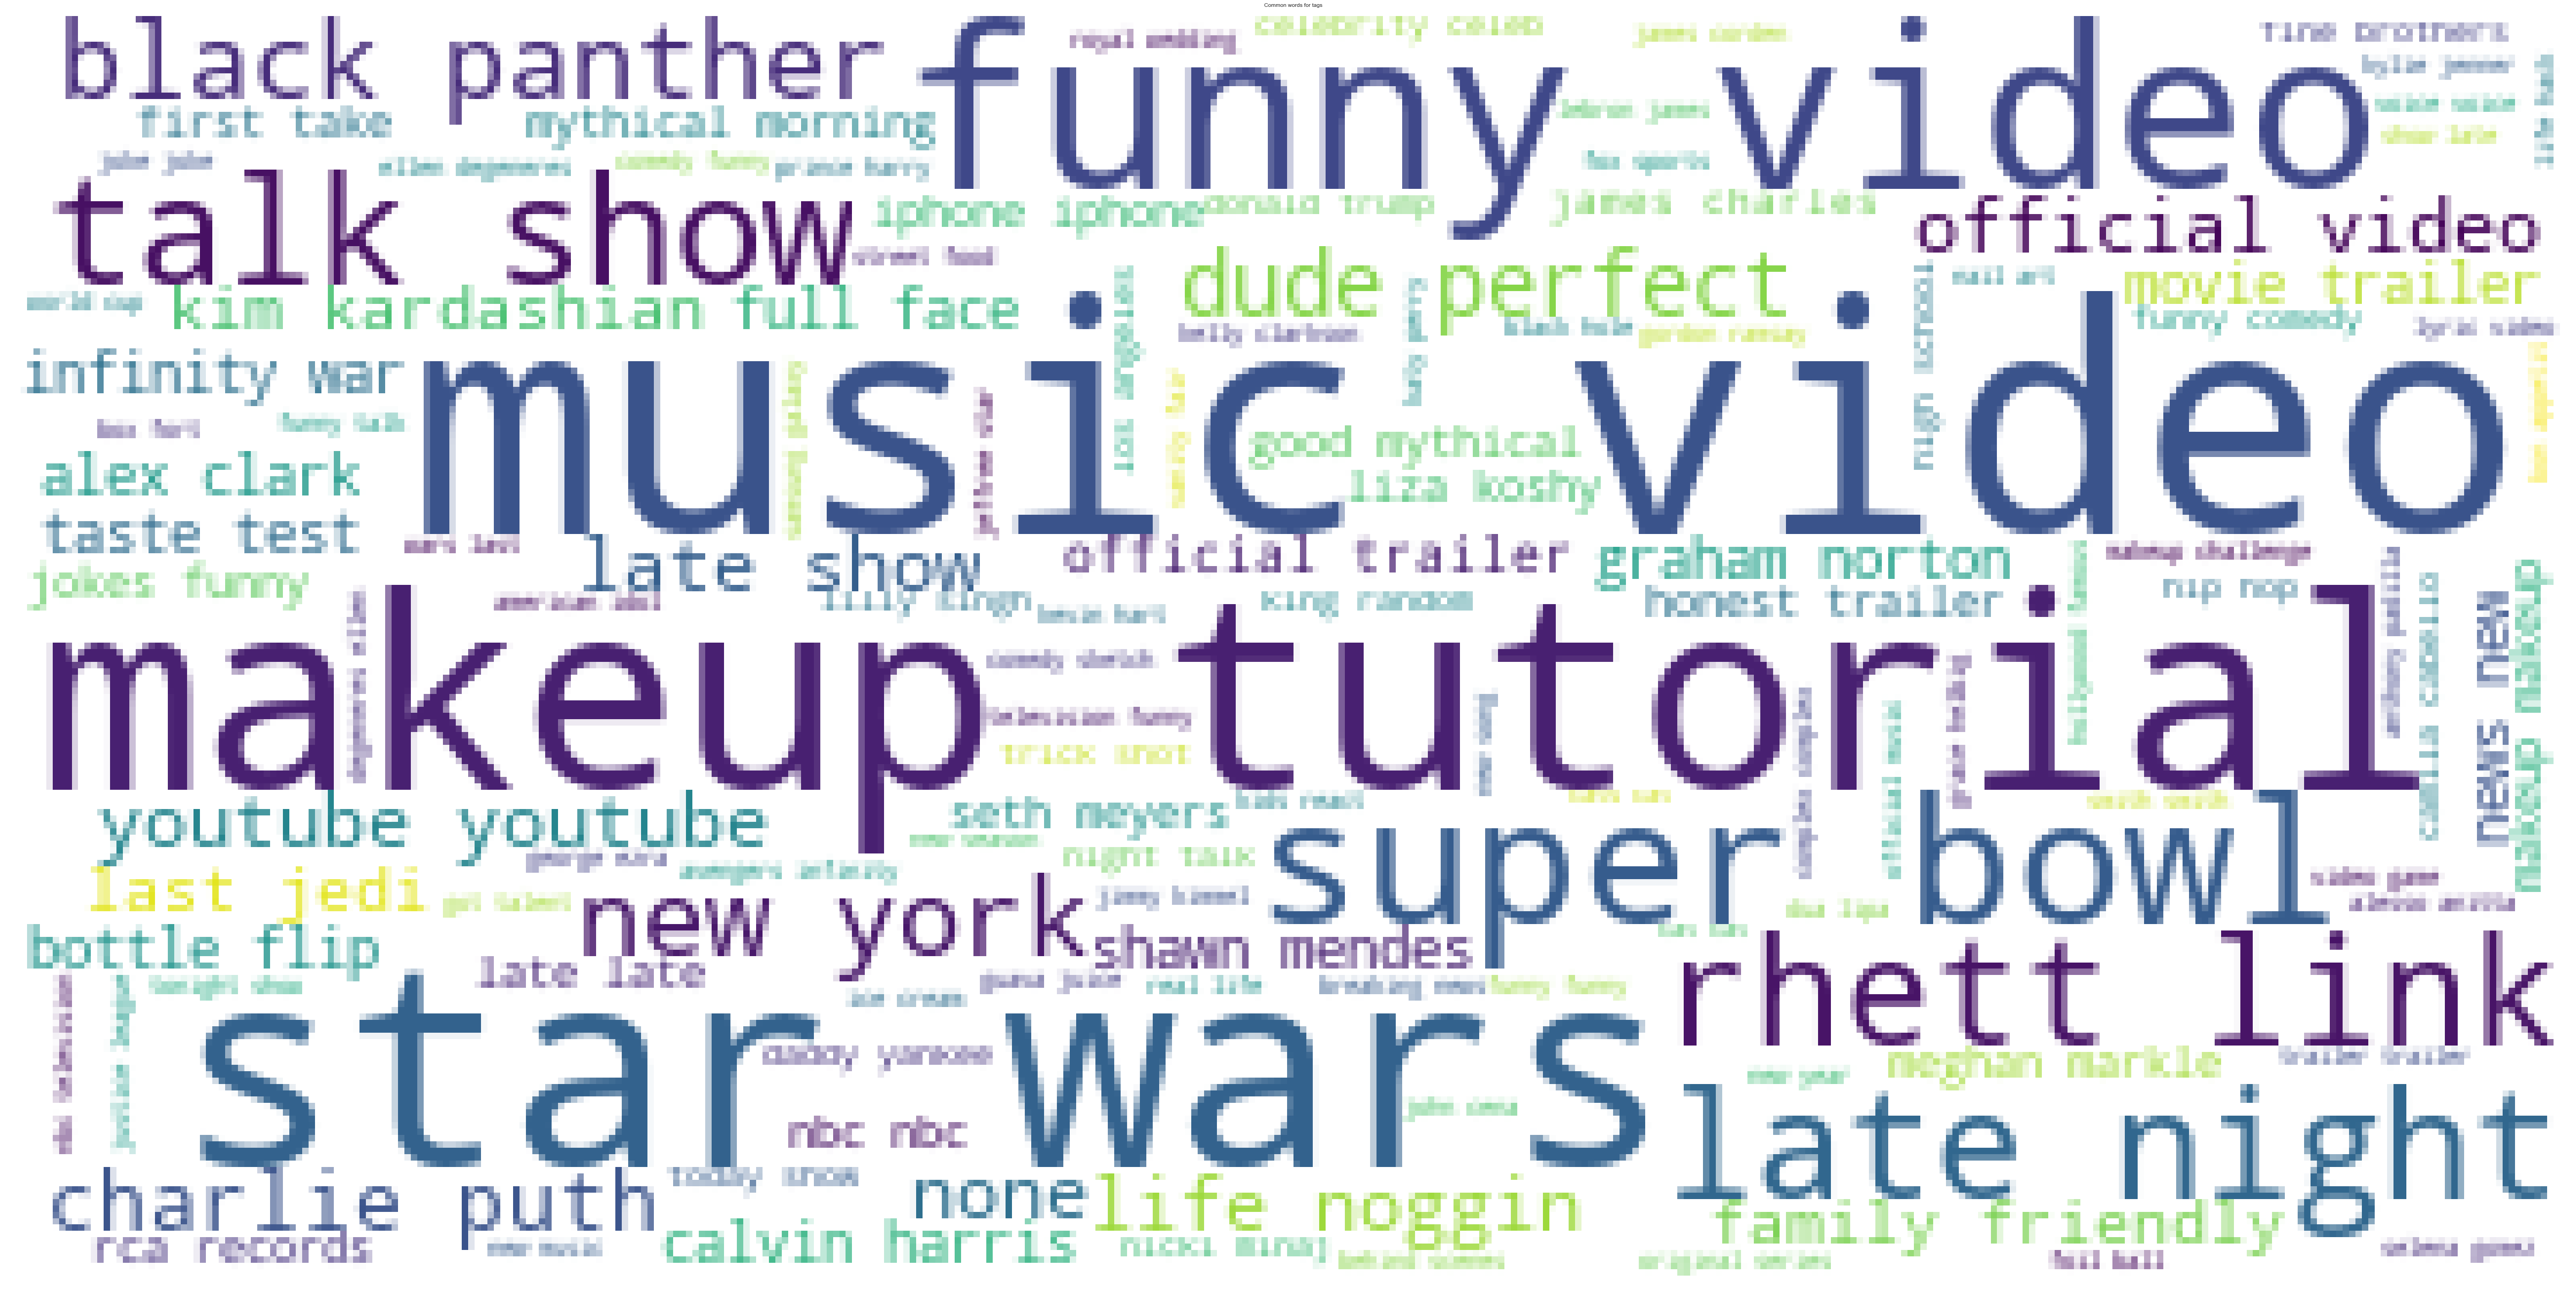

In [130]:
word_cloud(tags_text,'Common words for tags')

### Getting Frequency of most common words in description

In [131]:
us_df.description.head()

0    SHANTELL'S CHANNEL - https://www.youtube.com/s...
1    One year after the presidential election, John...
2    WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3    Today we find out if Link is a Nickelback amat...
4    I know it's been a while since we did this sho...
Name: description, dtype: object

In [140]:
desc_text=us_df.description.str.lower()
desc_text=desc_text.str.cat(sep=' ')
desc_text=re.sub('[^a-zA-Z]+',' ',desc_text)
desc_text=word_tokenize(desc_text)
desc_text=[w for w in desc_text if w not in stop_words]
desc_text=[w for w in desc_text if len(w)>3]

desc_dist=nltk.FreqDist(desc_text)
result_desc=pd.DataFrame(desc_dist.most_common(100),columns=['Word','Frequency'])

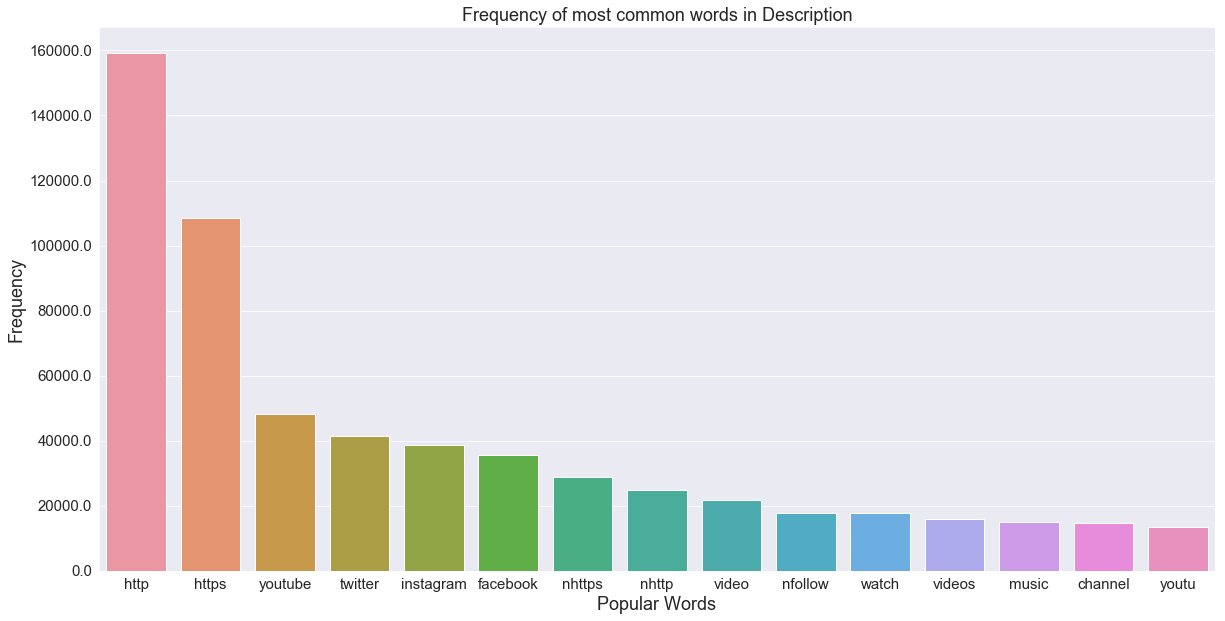

In [192]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
ax=sns.barplot(x='Word',y='Frequency',data=result_desc.head(15))
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Popular Words',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
plt.title('Frequency of most common words in Description',size=18)
plt.show()

### Word Cloud for description

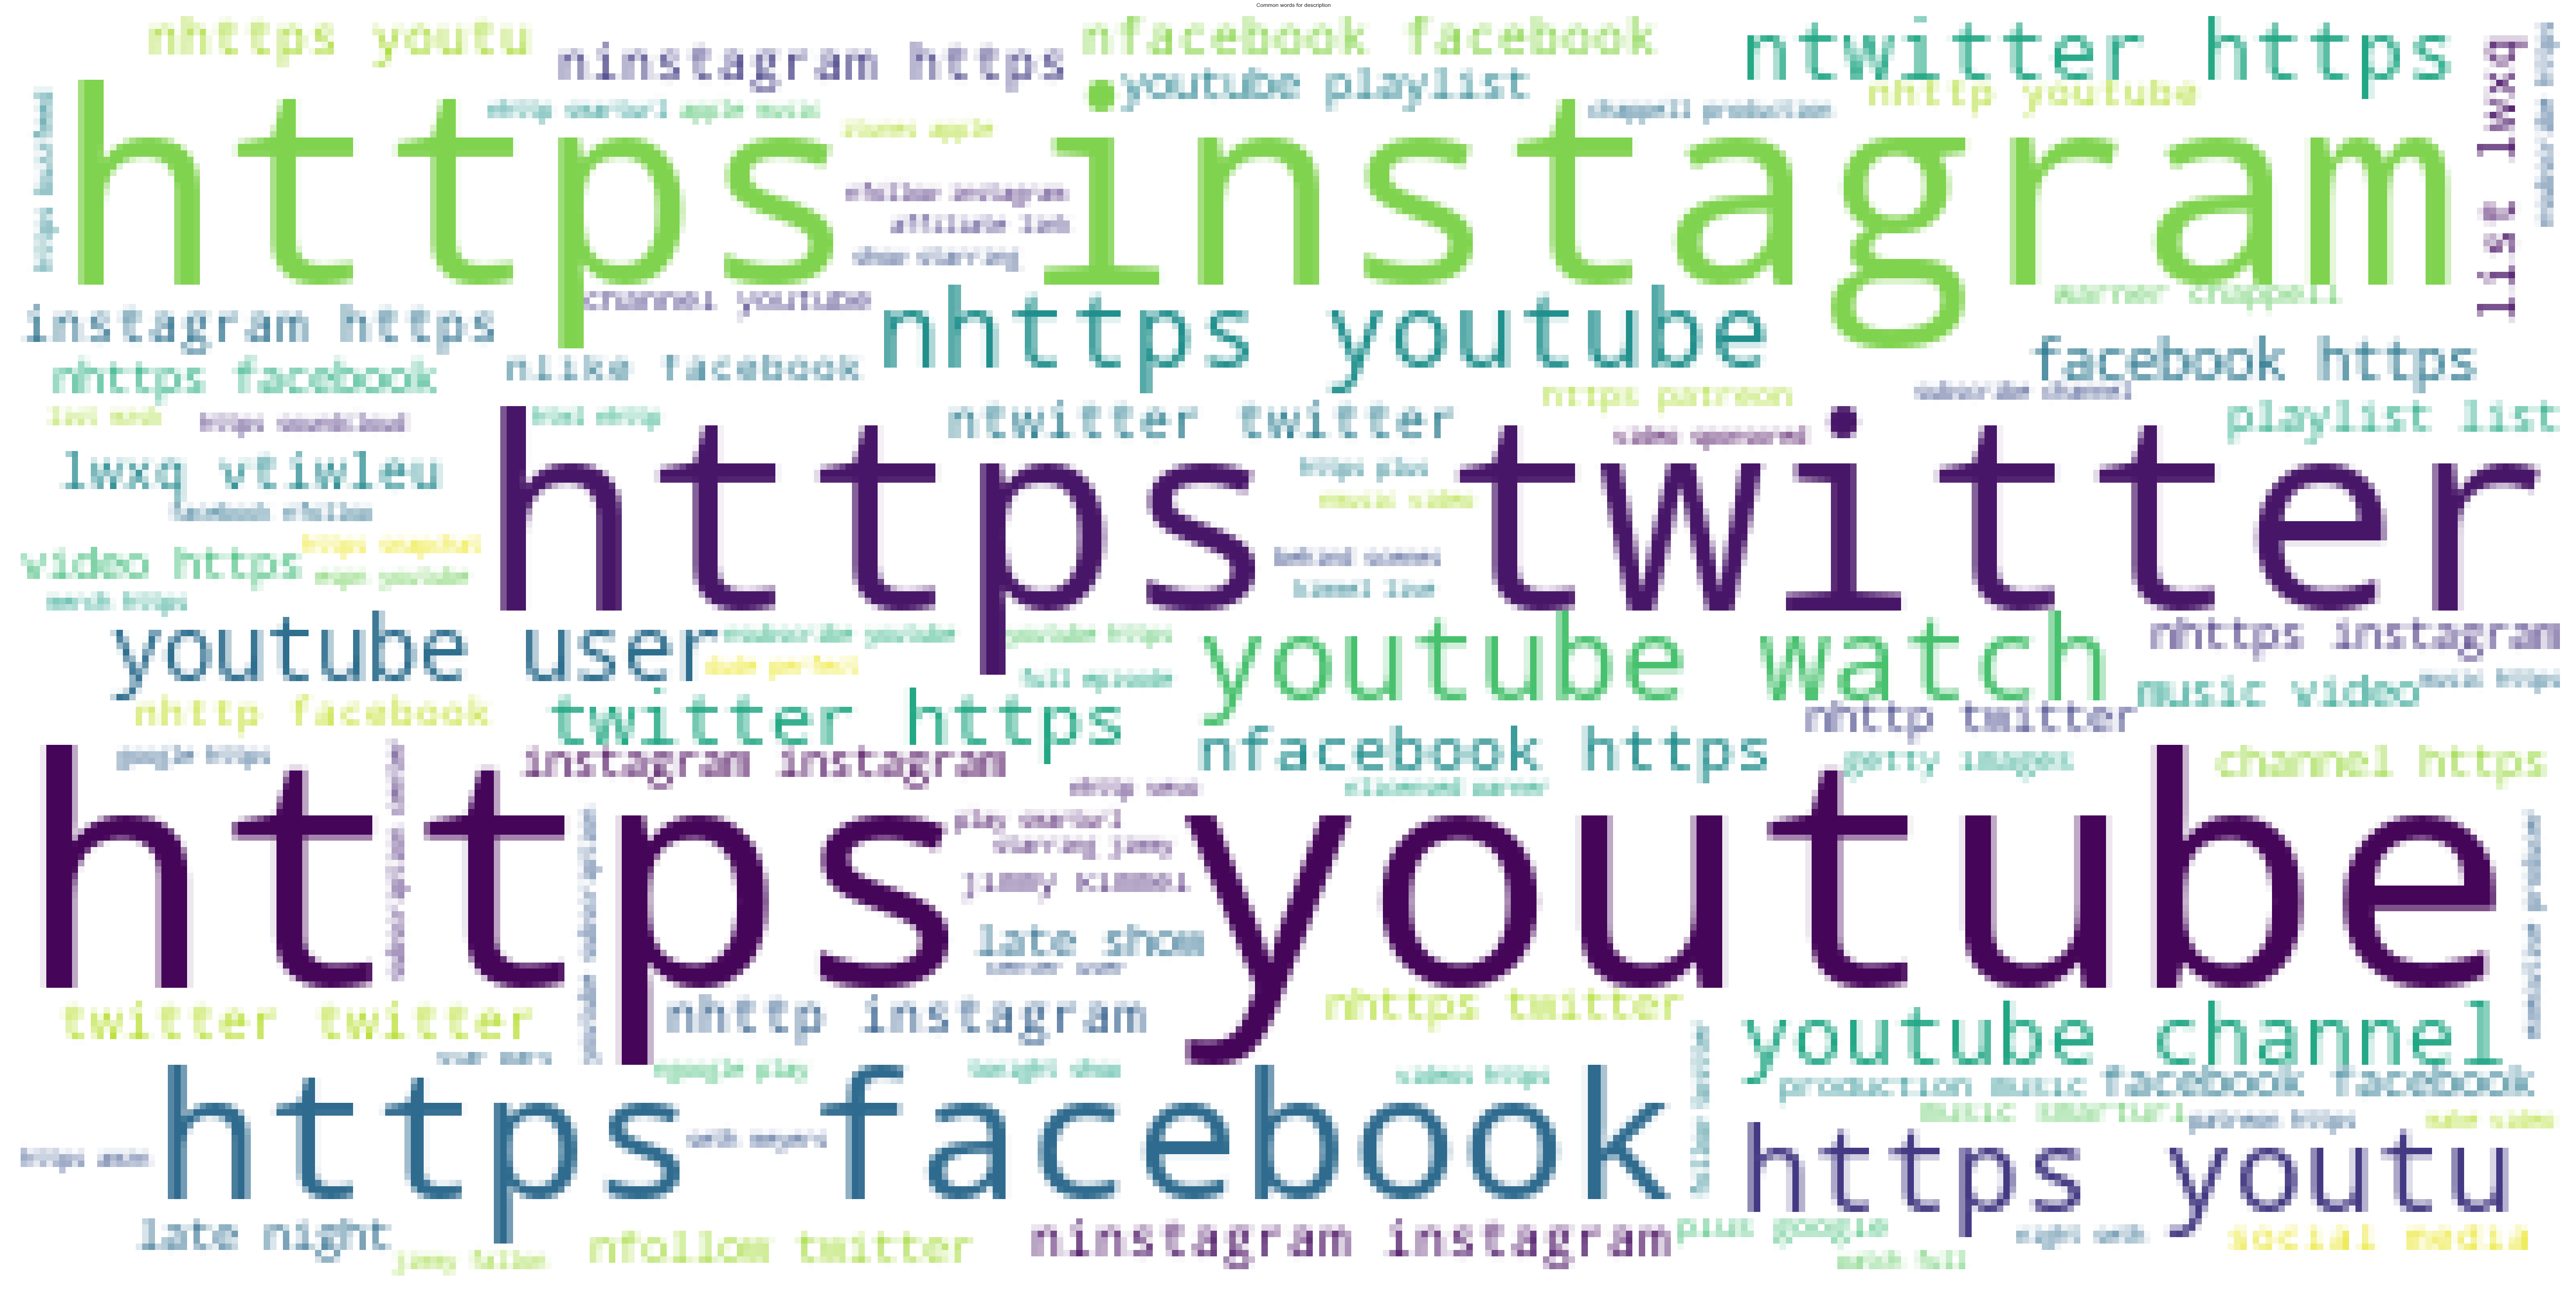

In [147]:
word_cloud(desc_text,'Common words for description')

## Sentiment Analysis on description, tags and title columns

### Sentiment Analysis on title

In [149]:
#getting the textblob library
from textblob import TextBlob

In [163]:
#defining a function to determine the sentiment type
def sentiment_predict(polarity):
    if polarity>0:
        return('Positive')
    elif polarity<0:
        return('Negative')
    else:
        return('Neutral')

In [165]:
# changing to string
us_df.title=us_df.title.astype('str')

#creating a list to store the sentence, it's polarity and it's subjectivity
title_sentiment=[]
#looping through the rows of the dataframe
for r in us_df.title:
    title_blob=TextBlob(r)
    title_sentiment.append((r,title_blob.polarity,title_blob.subjectivity))

#creating a dataframe of sentence, polarity and subjectivity
title_sentiment_df=pd.DataFrame(title_sentiment,columns=['Sentence','Polarity','Subjectivity'])

In [167]:
#applying the function to the polarity of the dataframe created above
title_sentiment_df['Sentiment']=title_sentiment_df['Polarity'].apply(sentiment_predict)

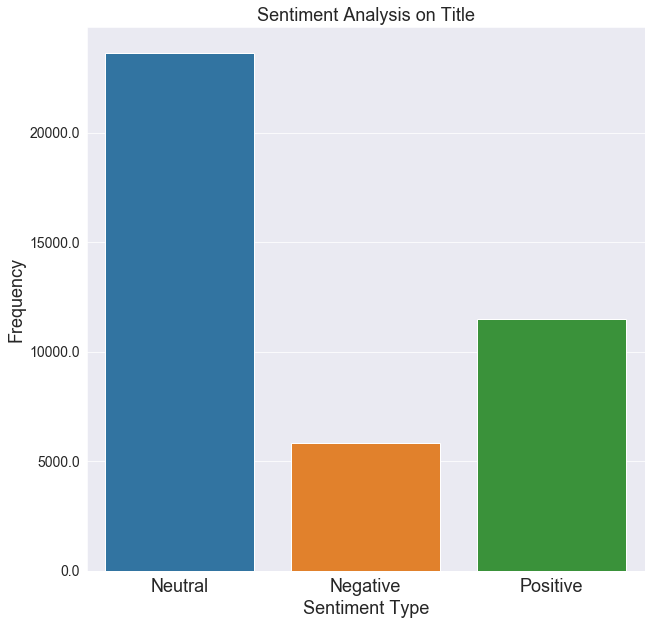

In [193]:
#Visualizing the number of sentiment types
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=title_sentiment_df)
ax.set_yticklabels(ax.get_yticks(),fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=18)
ax.set_xlabel('Sentiment Type',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
plt.title('Sentiment Analysis on Title',size=18)
plt.show()

### Sentiment Analysis on tag 

In [181]:
us_df.tags=us_df.tags.astype('str')

tag_sentiment=[]
for r in us_df.tags:
    tag_blob=TextBlob(r)
    tag_sentiment.append((r,tag_blob.polarity,tag_blob.subjectivity))
    
tag_sentiment_df=pd.DataFrame(tag_sentiment,columns=['Sentence','Polarity','Subjectivity'])

In [182]:
tag_sentiment_df['Sentiment']=tag_sentiment_df['Polarity'].apply(sentiment_predict)

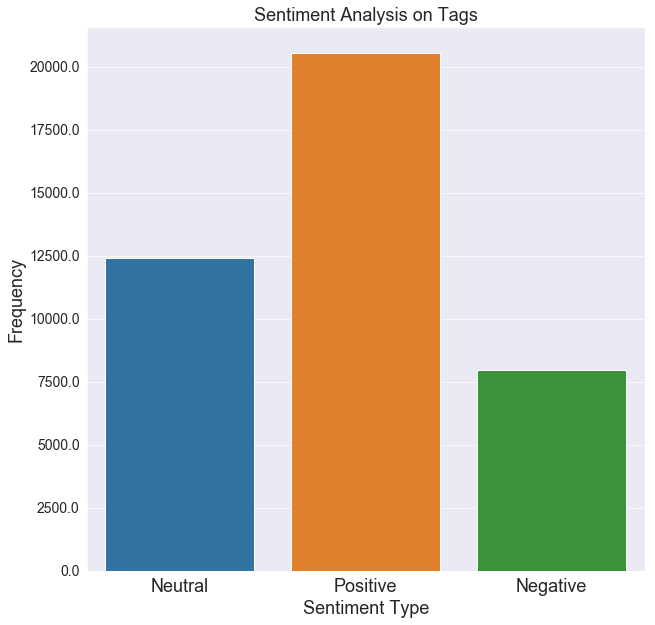

In [194]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=tag_sentiment_df)
ax.set_yticklabels(ax.get_yticks(),fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=18)
ax.set_xlabel('Sentiment Type',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
plt.title('Sentiment Analysis on Tags',size=18)
plt.show()

### Sentiment Analysis on Description

In [187]:
us_df.description=us_df.description.astype('str')

desc_sentiment=[]
for r in us_df.description:
    desc_blob=TextBlob(r)
    desc_sentiment.append((r,desc_blob.polarity,desc_blob.subjectivity))
    
desc_sentiment_df=pd.DataFrame(desc_sentiment,columns=['Sentence','Polarity','Subjectivity'])

In [188]:
desc_sentiment_df['Sentiment']=desc_sentiment_df['Polarity'].apply(sentiment_predict)

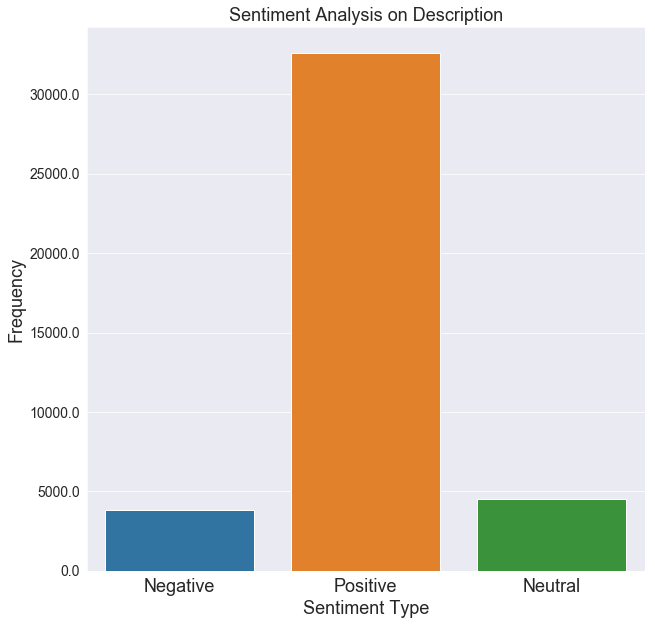

In [195]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=desc_sentiment_df)
ax.set_yticklabels(ax.get_yticks(),fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=18)
ax.set_xlabel('Sentiment Type',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
plt.title('Sentiment Analysis on Description',size=18)
plt.show()